In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import sqlite3 as sql
import pandas as pd

In [2]:
#Creating a database connection

import sqlite3
conn = sqlite3.connect('new_sql_db')

In [3]:
#Create a middleware between SQL database connection and SQL Query

execute_sql = conn.cursor()

In [4]:
#Import required tables as data frames

new_table = pd.read_csv('Astronauts.csv')
new_table

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [5]:
#Insert the table into SQL database

new_table.to_sql('Astronauts_table',
                 con = conn,
                 if_exists='replace')

357

In [6]:
#Read_sql method

result = pd.read_sql("""select * from Astronauts_table""", 
                     con = conn)
result

,index,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,None,None,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",None,None
1,1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,None,None,1,190,0,0.0,STS 51-F (Challenger),None,None
2,2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",None,None
3,3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",None,None
4,4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,None,None,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,None,None
353,353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,None,None,None
354,354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,None,None
355,355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,None,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",None,None


In [7]:
# Write and execute the SQL query
query = """
SELECT Gender, COUNT(*) AS Count
FROM Astronauts_table
GROUP BY Gender
"""

# Execute the query and fetch the results
gender_diversity = pd.read_sql_query(query, conn)

# Display the results
print(gender_diversity)

   Gender  Count
0  Female     50
1    Male    307


In [8]:
# Filter the DataFrame to count the number of astronauts with "Engineering" in their undergraduate major
engineering_count = new_table[new_table['Undergraduate Major'].str.contains('Engineering', case=False, na=False)].shape[0]

# Calculate the total number of astronauts
total_astronauts = new_table.shape[0]

# Calculate the percentage
percentage_engineering = (engineering_count / total_astronauts) * 100

# Display the percentage
print(f"Percentage of astronauts with 'Engineering' in their undergraduate degree: {percentage_engineering:.2f}%")

Percentage of astronauts with 'Engineering' in their undergraduate degree: 55.46%


In [9]:
# Filter the DataFrame to count the number of astronauts with more than one space flight
multiple_missions_count = new_table[new_table['Space Flights'] > 1].shape[0]

# Display the count
print(f"Number of astronauts with multiple space missions: {multiple_missions_count}")

Number of astronauts with multiple space missions: 245


In [10]:
# Filter the DataFrame to count the number of astronauts born in "Philadelphia"
philadelphia_count = new_table[new_table['Birth Place'].str.contains('Philadelphia', case=False, na=False)].shape[0]

# Display the count
print(f"Number of astronauts born in Philadelphia: {philadelphia_count}")

Number of astronauts born in Philadelphia: 6


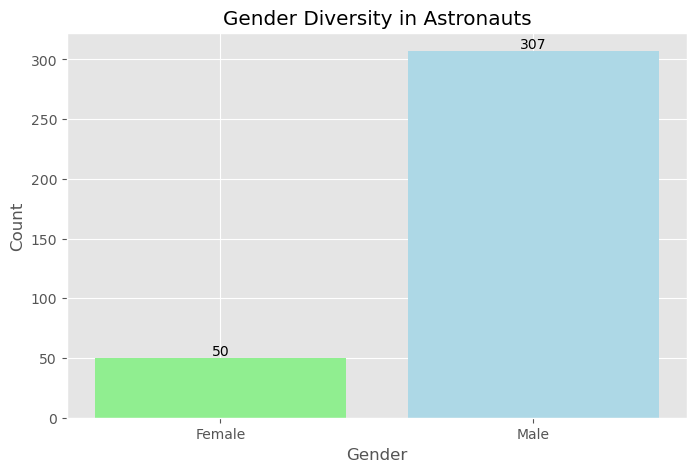

In [11]:
# Create a DataFrame with the results
data = {'Gender': ['Female', 'Male'], 'Count': [50, 307]}
gender_diversity = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(8, 5))
bars = plt.bar(gender_diversity['Gender'], gender_diversity['Count'], color=['Lightgreen', 'Lightblue'])

# Adding the count values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Adding titles and labels
plt.title('Gender Diversity in Astronauts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()


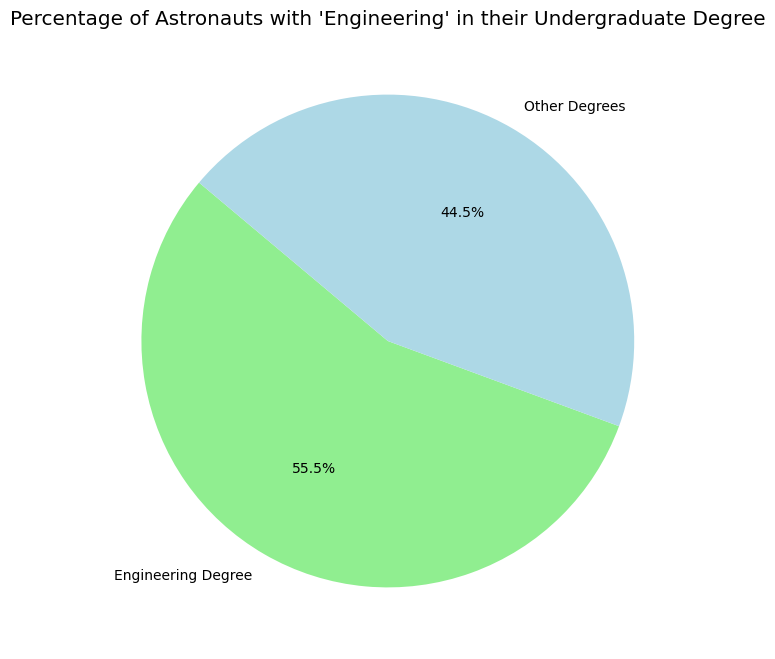

In [12]:
# Given data
engineering_count = 197  # assuming from 355 total astronauts, 197 have 'Engineering' in their major
total_astronauts = 355
percentage_engineering = (engineering_count / total_astronauts) * 100

# Data for the pie chart
labels = ['Engineering Degree', 'Other Degrees']
sizes = [percentage_engineering, 100 - percentage_engineering]
colors = ['Lightgreen', 'Lightblue']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Astronauts with 'Engineering' in their Undergraduate Degree")
plt.show()

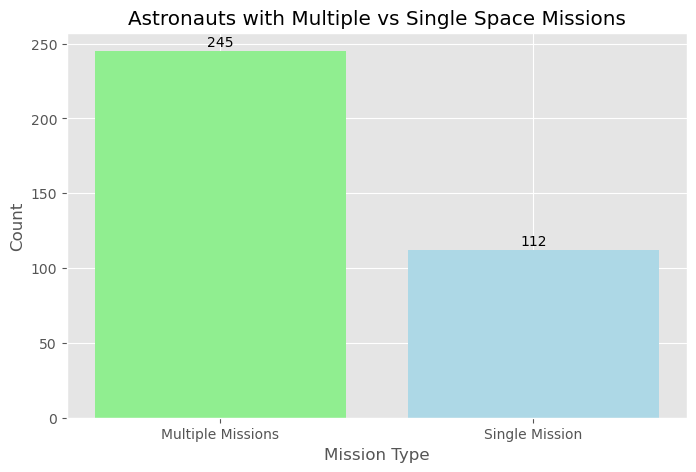

In [13]:
import matplotlib.pyplot as plt

# Data for the graph
labels = ['Multiple Missions', 'Single Mission']
counts = [245, 357 - 245]  # Total astronauts is 357 as per the previous data (50 + 307)

# Plotting the data
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=['Lightgreen', 'Lightblue'])

# Adding the count annotations on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, count, ha='center', va='bottom', color='black', fontsize=10)

# Titles and labels
plt.title('Astronauts with Multiple vs Single Space Missions')
plt.xlabel('Mission Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()



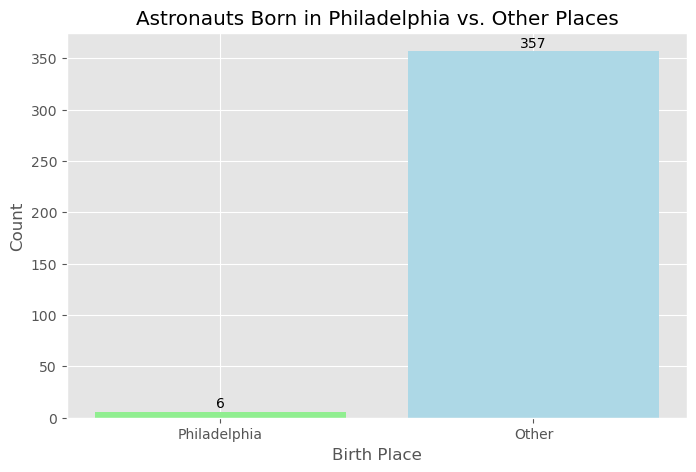

In [14]:
# Data
birth_places = ['Philadelphia', 'Other']
counts = [6, 357]

# Plotting the data
plt.figure(figsize=(8, 5))
bars = plt.bar(birth_places, counts, color=['Lightgreen', 'Lightblue'])

# Adding text labels on the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 4, count,
             ha='center', color='black')

# Adding titles and labels
plt.title('Astronauts Born in Philadelphia vs. Other Places')
plt.xlabel('Birth Place')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Showing the plot
plt.show()

